# 1. Install Dependencies and Setup

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# !pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [5]:
# !pip list

In [6]:
import tensorflow as tf
import os

In [7]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)

In [8]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

# 2. Remove dodgy images

In [9]:
import cv2
import imghdr

In [10]:
data_dir = '/content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat_imgage_data'

In [11]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [12]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Image not in ext list /content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat_imgage_data/ship/salmon-fishing-boat-Alaska.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat_imgage_data/ship/10282021_zim_122418.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat_imgage_data/ship/photo-copyright-toby-manuputthe-pasha-137259.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat_imgage_data/ship/allure-of-the-seas-texas-cruise-1.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat_imgage_data/ship/seamans-onwater.jpg
Image not in ext list /content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat_imgage_data/ship/c-12.jpg


# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1994 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator()

In [16]:
batch = data_iterator.next()

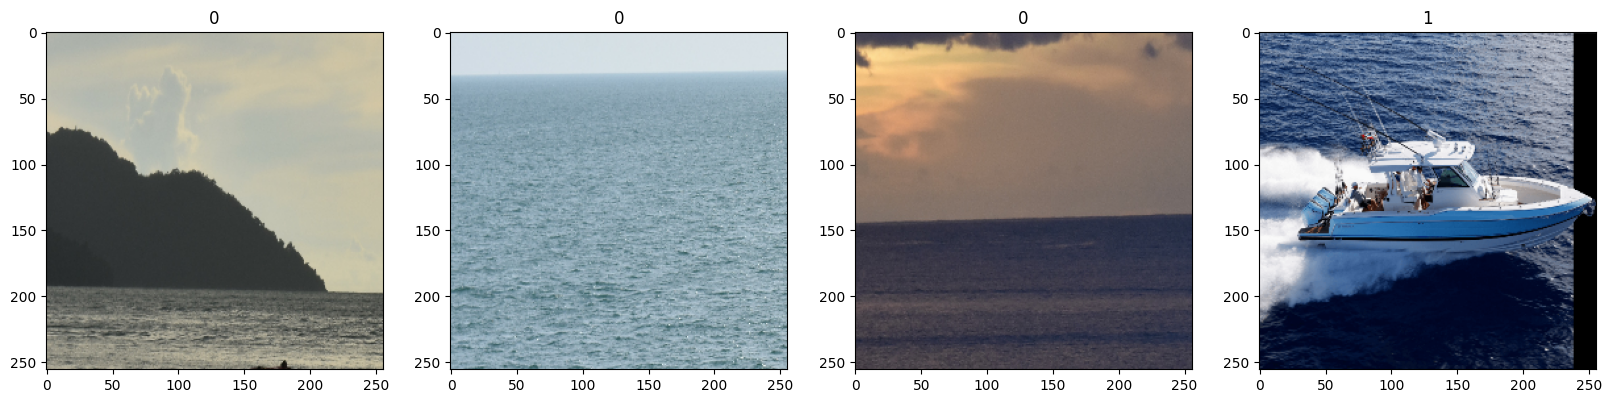

In [17]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [18]:
data = data.map(lambda x,y: (x/255, y))

In [19]:
data.as_numpy_iterator().next()

(array([[[[0.2101864 , 0.21452159, 0.18108101],
          [0.35571817, 0.36314768, 0.26613483],
          [0.19685489, 0.2069652 , 0.13882554],
          ...,
          [0.31039897, 0.4045166 , 0.49863425],
          [0.35351896, 0.43277755, 0.52648157],
          [0.31885722, 0.39027268, 0.48563114]],
 
         [[0.27534947, 0.2638313 , 0.17821117],
          [0.3829676 , 0.3559149 , 0.20858034],
          [0.47501484, 0.45436534, 0.3121472 ],
          ...,
          [0.3080351 , 0.4023519 , 0.4720976 ],
          [0.28501838, 0.39666054, 0.46764705],
          [0.3059867 , 0.41226736, 0.4740043 ]],
 
         [[0.501191  , 0.4541322 , 0.36001456],
          [0.5310758 , 0.48401693, 0.39313054],
          [0.49623352, 0.46705154, 0.39547095],
          ...,
          [0.3158548 , 0.384375  , 0.41945466],
          [0.28153387, 0.34591806, 0.3789297 ],
          [0.29913977, 0.37550312, 0.40431505]],
 
         ...,
 
         [[0.04748775, 0.09454657, 0.15729167],
          [0.04335

# 5. Split Data

In [20]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [21]:
train_size

44

In [22]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [23]:
train

<_TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [24]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [25]:
model = Sequential()

In [26]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [27]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [29]:
logdir='logs'

In [30]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [31]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
44/44 [==============================] - 131s 3s/step - loss: 0.4570 - accuracy: 0.8132 - val_loss: 0.2090 - val_accuracy: 0.9193
Epoch 2/20
44/44 [==============================] - 78s 2s/step - loss: 0.1909 - accuracy: 0.9297 - val_loss: 0.1580 - val_accuracy: 0.9427
Epoch 3/20
44/44 [==============================] - 76s 2s/step - loss: 0.1607 - accuracy: 0.9453 - val_loss: 0.1833 - val_accuracy: 0.9271
Epoch 4/20
44/44 [==============================] - 74s 2s/step - loss: 0.1422 - accuracy: 0.9496 - val_loss: 0.1705 - val_accuracy: 0.9349
Epoch 5/20
44/44 [==============================] - 76s 2s/step - loss: 0.1053 - accuracy: 0.9581 - val_loss: 0.1493 - val_accuracy: 0.9505
Epoch 6/20
44/44 [==============================] - 77s 2s/step - loss: 0.0940 - accuracy: 0.9652 - val_loss: 0.1024 - val_accuracy: 0.9583
Epoch 7/20
44/44 [==============================] - 116s 3s/step - loss: 0.0601 - accuracy: 0.9737 - val_loss: 0.1085 - val_accuracy: 0.9609
Epoch 8/20
44/44 [

# 8. Plot Performance

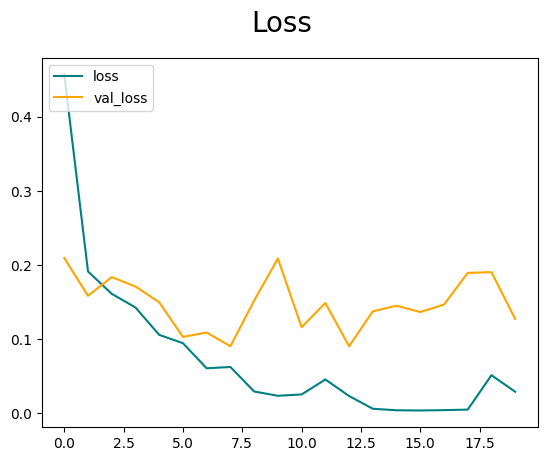

In [32]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

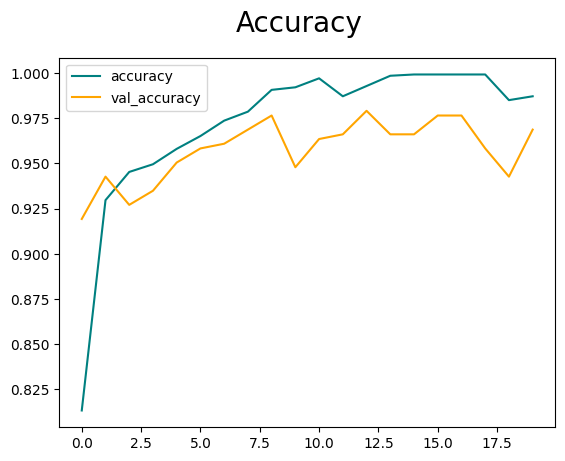

In [33]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [34]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [35]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [ ]:
print(pre.result(), re.result(), acc.result())

# 10. Test

In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/drive/MyDrive/Colab Notebooks/DA Assignments(China)/Boat or Sea Detection/boat.png')
plt.imshow(img)
plt.show()

In [ ]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [ ]:
yhat = model.predict(np.expand_dims(resize/255, 0))

In [ ]:
yhat

In [ ]:
if yhat > 0.5:
    print(f'Ship')
else:
    print(f'Not Ship')

# 11. Save the Model

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
model.save(os.path.join('models','imageclassifier.h5'))